# **Tugas Praktikum**


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### **1. Tugas K-Means**

In [76]:
df = pd.read_csv('C:\\kuliah\\Machine Leaning\\2341720003_ML_2025\\data\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
# Seleksi Fitur
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]
print(X.head())

   Age  Annual Income (k$)
0   19                  15
1   21                  15
2   20                  16
3   23                  16
4   31                  17


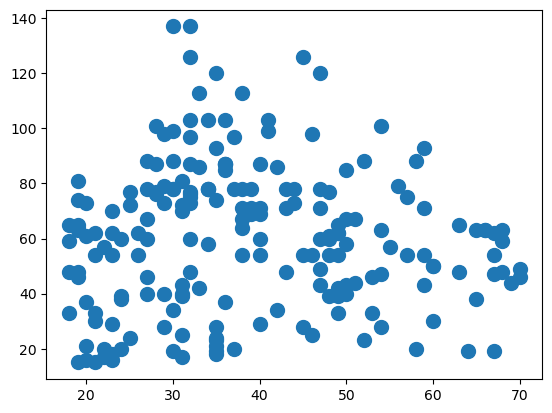

In [78]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [79]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


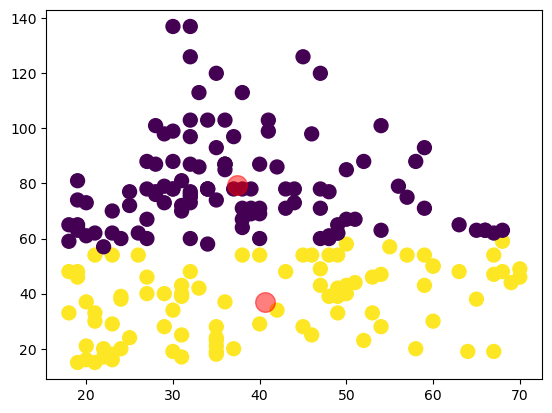

In [80]:
# Plot hasi cluster berdasarkan Age dan Annual income
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [81]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 87189.04625974289


c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

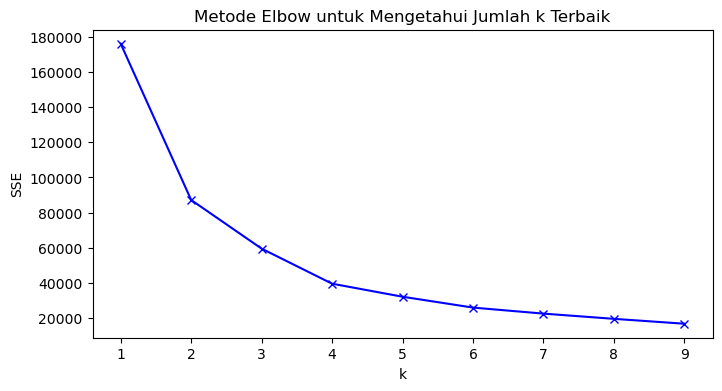

In [82]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [83]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=176108.77999999997
k=2; SSE=87179.72383252817
k=3; SSE=59492.737994932715
k=4; SSE=39542.349672654025
k=5; SSE=32124.39180035651
k=6; SSE=25944.02681650246
k=7; SSE=22513.26463220726
k=8; SSE=19544.909160087307
k=9; SSE=16763.151189149015


#### **2. Tugas DBSCAN**

In [84]:
# 1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
# membuat datasets makemoons
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

x, y = make_moons(1000, noise=0.05, random_state=0)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0.5, 1.0, 'Data Sebelum Normalisasi')

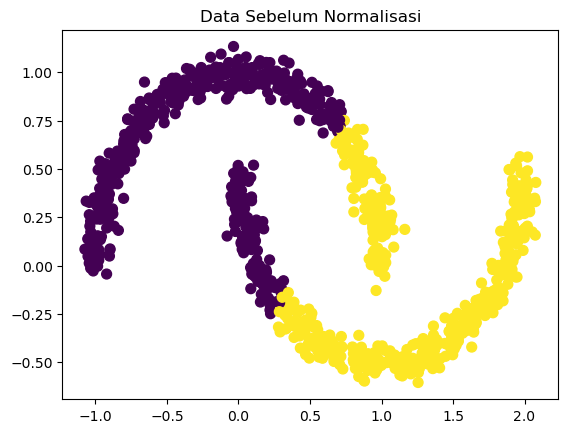

In [85]:
labels = KMeans(2, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels,s=50, cmap='viridis');
plt.title("Data Sebelum Normalisasi")

Text(0.5, 1.0, 'Data Setelah Normalisasi')

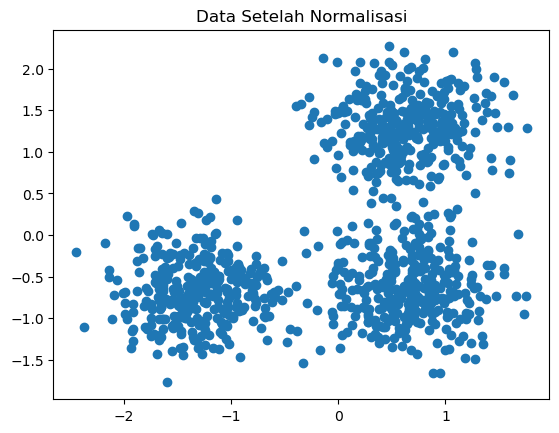

In [86]:
centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.4, random_state=0,
)

x = StandardScaler().fit_transform(x)
plt.scatter(x[:, 0], x[:, 1])
plt.title("Data Setelah Normalisasi")


In [87]:
# 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
db = DBSCAN(eps=0.2, min_samples=5).fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 34


In [88]:
# 3.Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
)
print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(x, labels):.3f}")


Homogeneity: 0.547
Completeness: 0.788
V-measure: 0.646
Adjusted Rand Index: 0.540
Adjusted Mutual Information: 0.645
Silhouette Coefficient: 0.408


()

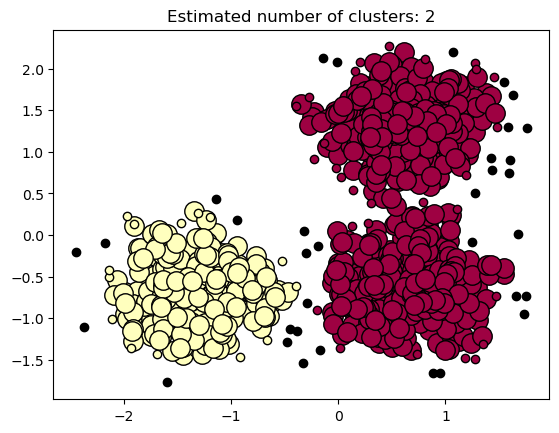

In [89]:
# 4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]

    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
()

In [90]:
# 5. Lakukan eksperimen:
# eps = 0.05, 0.1, 0.3, 0.5
# min_samples = 3, 10, 20
# Catat perubahan klaster, noise, dan kualitas evaluasi.

eps_list = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_list = [3, 10, 20]

print("\nEksperimen DBSCAN (eps, min_samples):")
print("eps\tmin_samples\tclusters\tnoise\tH\tC\tV\tARI\tAMI\tSilhouette")
for eps in eps_list:
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(x)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        # Untuk evaluasi, jika semua noise, skip
        if n_clusters_ == 0:
            H = C = V = ARI = AMI = Silhouette = 0
        else:
            H = metrics.homogeneity_score(labels_true, labels)
            C = metrics.completeness_score(labels_true, labels)
            V = metrics.v_measure_score(labels_true, labels)
            ARI = metrics.adjusted_rand_score(labels_true, labels)
            AMI = metrics.adjusted_mutual_info_score(labels_true, labels)
            try:
                Silhouette = metrics.silhouette_score(x, labels)
            except:
                Silhouette = 0
        print(f"{eps:.2f}\t{min_samples}\t\t{n_clusters_}\t\t{n_noise_}\t{H:.2f}\t{C:.2f}\t{V:.2f}\t{ARI:.2f}\t{AMI:.2f}\t{Silhouette:.2f}")




Eksperimen DBSCAN (eps, min_samples):
eps	min_samples	clusters	noise	H	C	V	ARI	AMI	Silhouette
0.05	3		99		482	0.52	0.19	0.28	0.01	0.23	-0.16
0.05	10		0		1000	0.00	0.00	0.00	0.00	0.00	0.00
0.05	20		0		1000	0.00	0.00	0.00	0.00	0.00	0.00
0.10	3		24		149	0.84	0.48	0.61	0.59	0.61	-0.14
0.10	10		15		567	0.43	0.29	0.35	0.08	0.34	-0.32
0.10	20		0		1000	0.00	0.00	0.00	0.00	0.00	0.00
0.20	3		3		17	0.55	0.82	0.66	0.54	0.66	0.19
0.20	10		3		86	0.88	0.75	0.81	0.85	0.81	0.56
0.20	20		3		232	0.77	0.61	0.69	0.64	0.68	0.41
0.30	3		1		4	0.00	0.08	0.00	0.00	0.00	0.23
0.30	10		2		12	0.54	0.87	0.67	0.55	0.67	0.46
0.30	20		3		39	0.91	0.82	0.87	0.91	0.87	0.60
0.50	3		1		0	0.00	1.00	0.00	0.00	0.00	0.00
0.50	10		1		0	0.00	1.00	0.00	0.00	0.00	0.00
0.50	20		1		0	0.00	1.00	0.00	0.00	0.00	0.00
